In [1]:
# import necessary libraries

import face_recognition as fr
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [2]:
# Load Train images

ROOT = 'Desktop\\datasets\\avengers_images\\train'

train_faces = []
train_labels = []

for file in os.listdir(ROOT):
    path = os.path.join(ROOT, file)
    for image in os.listdir(path):
        img = fr.load_image_file(os.path.join(path, image))
        encoding = fr.face_encodings(img)
        try:
            train_faces.append(encoding[0])
            train_labels.append(file) 
        except:
            pass
        
print(len(train_faces))
print(len(train_labels))

251
251


Chris Evans


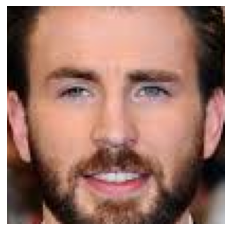

Chris Evans


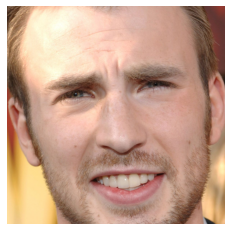

Chris Evans


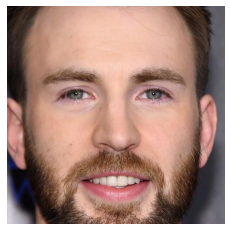

Chris Evans


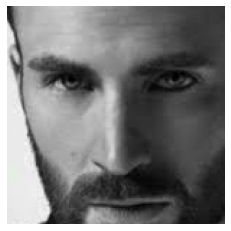

Chris Evans


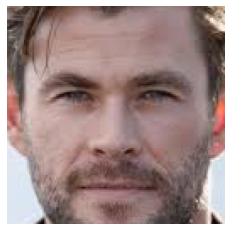

Chris Hemsworth


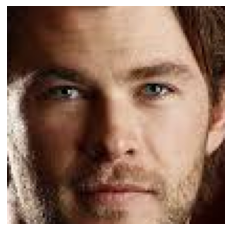

Chris Hemsworth


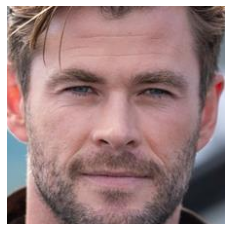

Chris Hemsworth


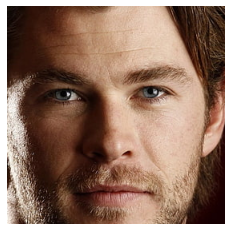

Mark Ruffalo


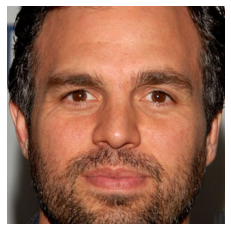

Chris Evans


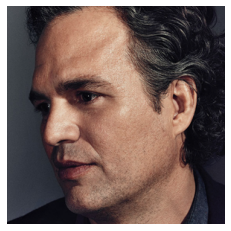

Mark Ruffalo


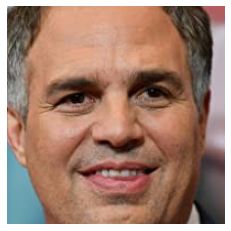

Mark Ruffalo


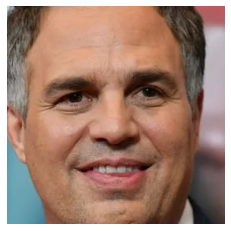

Robert Downey Jr


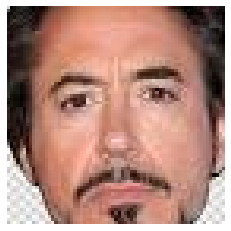

Robert Downey Jr


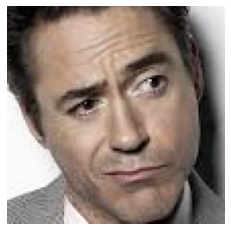

Robert Downey Jr


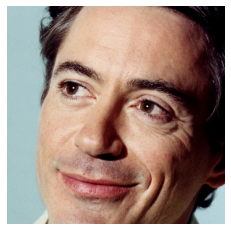

Scarlett Johansson


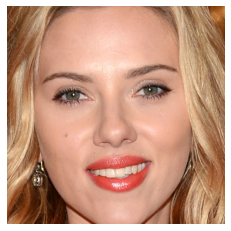

Scarlett Johansson


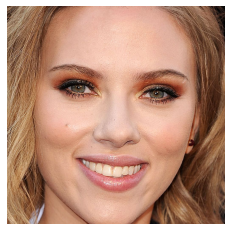

Scarlett Johansson


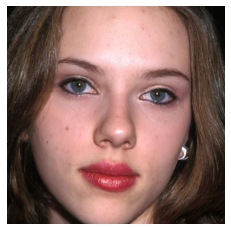

In [3]:
ROOT = 'Desktop\\datasets\\avengers_images\\test'

for image in os.listdir(ROOT):
    img = fr.load_image_file(os.path.join(ROOT, image))
    locations = fr.face_locations(img, model ='cnn')
    encodings = fr.face_encodings(img, locations)

    for face_encoding, face_location in zip(encodings, locations):
        result = fr.compare_faces(train_faces, face_encoding, tolerance=0.6)
        if True in result:
            match = train_labels[result.index(True)]
        else:
            match = 'No match found'
        
    print(match)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print("====================")
        

In [4]:
# This is the code for displaying images using OpenCV
# It has extra features, such as overlaying rectangles and labels over the image itself
# I used matplotlib instead, to make sure that the images and predictions 
## are part of the notebook and people can see the test images, and not separate windows like it is for OpenCV
# However, I included the code here for reference

'''
ROOT = 'Desktop\\datasets\\avengers_images\\test'

for image in os.listdir(ROOT):
    img = fr.load_image_file(os.path.join(ROOT, image))
    locations = fr.face_locations(img, model ='cnn')
    encodings = fr.face_encodings(img, locations)
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    for face_encoding, face_location in zip(encodings, locations):
        result = fr.compare_faces(train_faces, face_encoding, tolerance=0.6)
        if True in result:
            match = train_labels[result.index(True)]
        else:
            match = 'No match found'

    # coordinates for first rectangle
    coor1 = (face_location[3], face_location[0])
    coor2 = (face_location[1], face_location[2])
    color = (0,255,0)
    cv.rectangle(img, coor1, coor2, color, thickness=2)

    # coordinates for second rectangle
    coor1 = (face_location[3], face_location[2])
    coor2 = (face_location[1], face_location[2]+20)
    cv.rectangle(img, coor1, coor2, color, thickness=-1)
    cv.putText(img, match, (face_location[3]+10, face_location[2]+25), 
               cv.FONT_HERSHEY_SIMPLEX, 0.5, (250,250,250),thickness=2)

    cv.imshow(image, img)
    cv.waitKey(5000)
    
cv.destroyAllWindows()
    
'''


"\nROOT = 'Desktop\\datasets\\avengers_images\\test'\n\nfor image in os.listdir(ROOT):\n    img = fr.load_image_file(os.path.join(ROOT, image))\n    locations = fr.face_locations(img, model ='cnn')\n    encodings = fr.face_encodings(img, locations)\n    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)\n\n    for face_encoding, face_location in zip(encodings, locations):\n        result = fr.compare_faces(train_faces, face_encoding, tolerance=0.6)\n        if True in result:\n            match = train_labels[result.index(True)]\n        else:\n            match = 'No match found'\n\n    # coordinates for first rectangle\n    coor1 = (face_location[3], face_location[0])\n    coor2 = (face_location[1], face_location[2])\n    color = (0,255,0)\n    cv.rectangle(img, coor1, coor2, color, thickness=2)\n\n    # coordinates for second rectangle\n    coor1 = (face_location[3], face_location[2])\n    coor2 = (face_location[1], face_location[2]+20)\n    cv.rectangle(img, coor1, coor2, color, thickness=-1